### Read data

## Imports

In [4]:
import numpy as np
from skimage import data, io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops_table
from skimage.morphology import closing, square, remove_small_objects
import napari
import utils
import PIL

(30, 1197, 1299, 3)
(1197, 1299, 3)


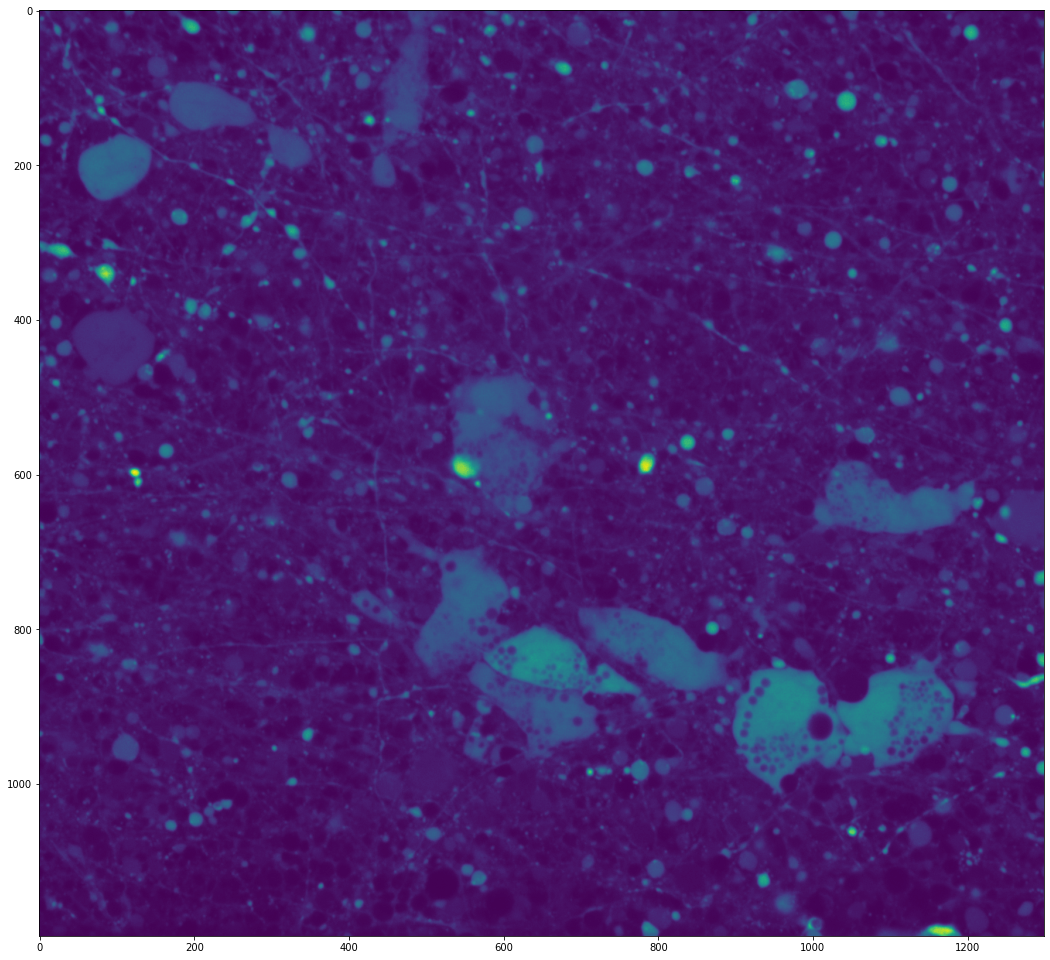

In [7]:
import matplotlib.pyplot as plt
stack_63X_1 = io.imread('data/63X/AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.05.28_1BGTHP2.tif')
#io.imshow(stack_63X_1[0])
print(stack_63X_1.shape)
Image = stack_63X_1[0]/np.amax(stack_63X_1[0])
#Image = np.clip(Image, 0, 1)
print(Image.shape)
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(Image[:,:,2])

In [13]:
#fig, ax = plt.subplots(figsize=(18, 18))
print((Image[:,:,2][Image[:,:,2] < 1000]).shape)

(1197, 1299)


In [5]:
import cv2

#image = cv2.imread('download.jpg')

b = Image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = Image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = Image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# RGB - Blue
cv2.imshow('B-RGB', b)

# RGB - Green
cv2.imshow('G-RGB', g)

# RGB - Red
cv2.imshow('R-RGB', r)


In [4]:
# load the image and segment it
image = stack_63X_1[0]#data.coins()[50:-50, 50:-50]
label_image = utils.segment(image)

# create the features dictionary
features = regionprops_table(
    label_image, properties=('label', 'bbox', 'perimeter', 'area')
)
features['circularity'] = utils.circularity(
    features['perimeter'], features['area']
)

# initialise viewer with coins image
viewer = napari.view_image(image, name='63X_1_1', rgb=True)

# add the labels
label_layer = viewer.add_labels(label_image, name='segmentation')

if __name__ == '__main__':
    napari.run()

/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/utils.py:60: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1197, 1299, 3) looks like that of an RGB image.
  thresh = threshold_otsu(image)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)

/home/julia/.local/share/virtualenvs/tau_nerve_segmentation-s0uDq-Et/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


ValueError: image has wrong mode

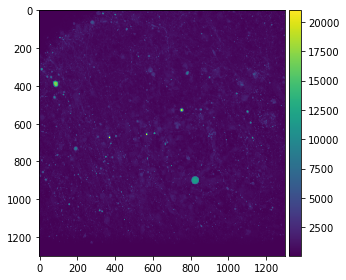

In [6]:
#import PIL
#from PIL import ImageEnhanceimg
#image = stack_63X_1[0]#
#io.imshow(Image)
#PIL_image = PIL.Image.fromarray(Image)

PIL_image = PIL.Image.fromarray(stack_63X_1[0])
io.imshow(np.asarray(PIL_image))
from PIL import ImageEnhance
converter = ImageEnhance.Contrast(PIL_image)
img2 = converter.enhance(1)
#img3 = converter.enhance(2)
#io.imshow(np.asarray(img2))
#io.imshow(img2)
#io.imshow(img3)

In [ ]:
import cv2

#image = cv2.imread('1.jpg')

alpha = 1.5 # Contrast control (1.0-3.0)
beta = 50 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(Image, alpha=alpha, beta=beta)

cv2.imshow('original', Image)
cv2.imshow('adjusted', adjusted)
cv2.waitKey()

In [ ]:
io.imshow(Image)
print(Image.shape)
maxValue = np.amax(Image)
minValue = np.amin(Image)
print(maxValue)
print(minValue)

#red channel
io.imshow(Image[:][:][0])

#green channel
io.imshow(Image[:][:][1])

#blue channel
io.imshow(Image[:][:][2])